In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

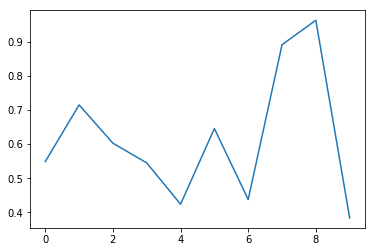

In [2]:
np.random.seed(0)
plt.plot(np.random.rand(10));

In [ ]:
from mpld3 import plugins

fig, ax = plt.subplots()
ax.plot(np.random.random(10))
plugins.clear(fig)  # clear all plugins from the figure
mpld3.display(fig)

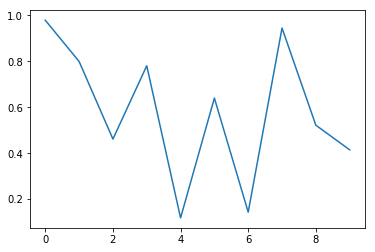

In [4]:
from mpld3 import plugins

fig, ax = plt.subplots()
ax.plot(np.random.random(10))
plugins.clear(fig)  # clear all plugins from the figure

plugins.connect(fig, plugins.Reset(), plugins.BoxZoom(), plugins.Zoom())

TypeError: Object of type 'ndarray' is not JSON serializable

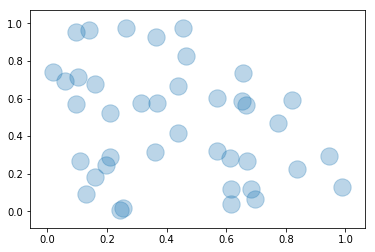

In [5]:
fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)

labels = ["Point {0}".format(i) for i in range(40)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)

In [11]:
import numpy as np

from bokeh.plotting import figure, output_file, show
from bokeh.models import LogColorMapper, LogTicker, ColorBar

output_file('color_bar.html')

def normal2d(X, Y, sigx=1.0, sigy=1.0, mux=0.0, muy=0.0):
    z = (X-mux)**2 / sigx**2 + (Y-muy)**2 / sigy**2
    return np.exp(-z/2) / (2 * np.pi * sigx * sigy)

X, Y = np.mgrid[-3:3:100j, -2:2:100j]
Z = normal2d(X, Y, 0.1, 0.2, 1.0, 1.0) + 0.1*normal2d(X, Y, 1.0, 1.0)
image = Z

color_mapper = LogColorMapper(palette="Viridis256", low=1, high=1e7)

plot = figure(x_range=(0,1), y_range=(0,1))
plot.image(image=[image], color_mapper=color_mapper,
           dh=[3], dw=[3], x=[1], y=[1])

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

plot.add_layout(color_bar, 'right')

show(plot)